# Code comparison - program 1242 

Comparison of ImPlaneIA, SAMPip, and AMICAL reductions of data from program 1242.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from astropy.table import Table

from tqdm import tqdm

from glob import glob
from amical.oifits import load

%matplotlib inline

## ImPlaneIA

In [59]:
fnames = glob('../data/testing_1242/implaneia_rachel/jw*.oifits')
print(len(fnames), 'files found')
print(fnames)

17 files found
['../data/testing_1242/implaneia_rachel/jw01242004001_03104_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242005001_03103_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242002001_03103_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242003001_03104_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242004001_03105_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242005001_03102_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242002001_03102_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242001001_03104_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242001001_03103_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242003001_03102_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242004001_03102_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw01242005001_03105_00001_nis.oifits', '../data/testing_1242/implaneia_rachel/jw0124200

In [60]:
fname = fnames[0]

In [61]:
# use amical to load the data

def extract_data(fname):
    data = load(fname)
    cols = list(data.keys())
    wdata, vdata, v2data, t3data = data['OI_WAVELENGTH'], data['OI_VIS'], data['OI_VIS2'], data['OI_T3']
    wavels, band = wdata['EFF_WAVE'], wdata['EFF_BAND']
    u, v, vis2, vis2err = v2data['UCOORD'], v2data['VCOORD'], v2data['VIS2DATA'], v2data['VIS2ERR']
    t3phi, t3phierr, t3amp, t3amperr, t3u1, t3u2, t3v1, t3v2 = t3data['T3PHI'], t3data['T3PHIERR'], t3data['T3AMP'], \
        t3data['T3AMPERR'], t3data['U1COORD'], t3data['U2COORD'], t3data['V1COORD'], t3data['V2COORD']
    return wavels, band, u, v, vis2, vis2err, t3phi, t3phierr, t3amp, t3amperr, t3u1, t3u2, t3v1, t3v2

Text(0.5, 0.98, 'Data from ../data/testing_1242/implaneia_rachel/jw01242005001_03104_00001_nis.oifits')

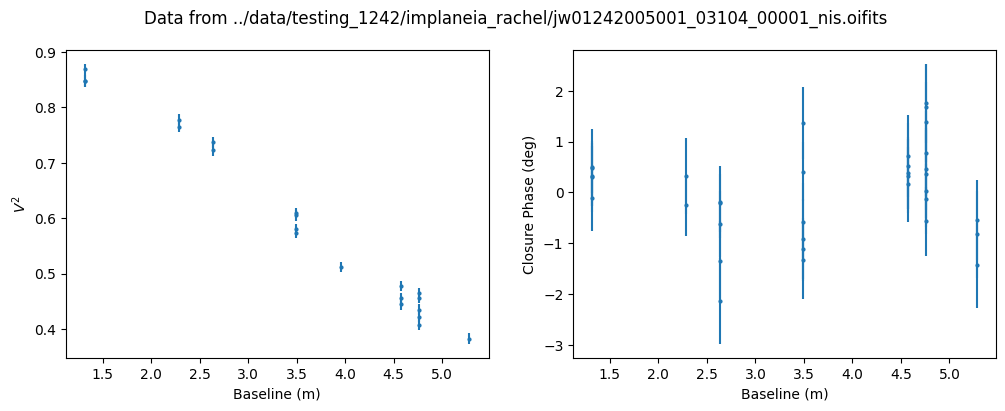

In [91]:
# plot the visibilities and closure phases as a function of baseline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# visibilities
ax1.errorbar(np.sqrt(u**2 + v**2), vis2, yerr=vis2err, fmt='o',markersize=2)
ax1.set_xlabel('Baseline (m)')
ax1.set_ylabel(r'$V^2$')

# closure phases vs first baseline
ax2.errorbar(np.sqrt(t3u1**2 + t3v1**2), t3phi, yerr=t3phierr, fmt='o',markersize=2)
ax2.set_xlabel('Baseline (m)')
ax2.set_ylabel('Closure Phase (deg)')

plt.suptitle('Data from {}'.format(fname))

100%|██████████| 17/17 [00:00<00:00, 87.13it/s]


Text(0.5, 0.98, 'Data from all files in folder')

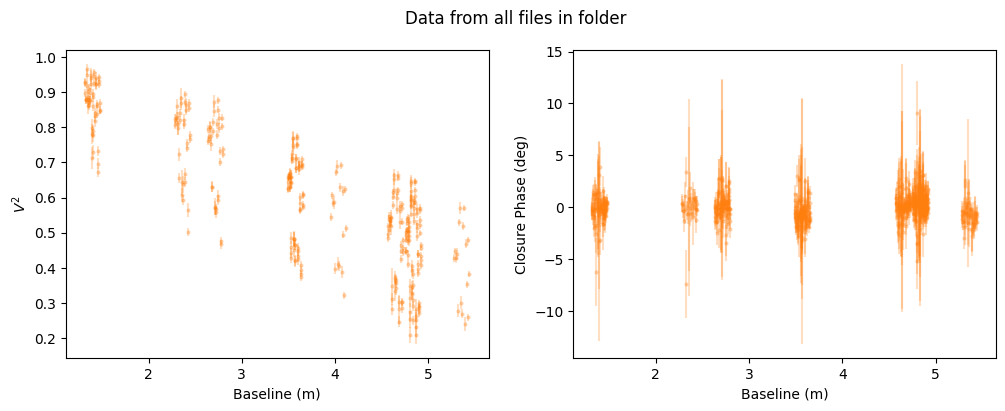

In [96]:
# now do this looping over all datasets in the folder

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

for j, fname in enumerate(tqdm(fnames)):
    wavels, band, u, v, vis2, vis2err, t3phi, t3phierr, t3amp, t3amperr, t3u1, t3u2, t3v1, t3v2 = extract_data(fname)

    # visibilities
    ax1.errorbar(np.sqrt(u**2 + v**2) + (0.01*j), vis2, yerr=vis2err, fmt='o',markersize=2,alpha=0.25,color='C1')

    # closure phases vs first baseline
    ax2.errorbar(np.sqrt(t3u1**2 + t3v1**2)+ (0.01*j), t3phi, yerr=t3phierr, fmt='o',markersize=2,alpha=0.25,color='C1')

ax1.set_xlabel('Baseline (m)')
ax1.set_ylabel(r'$V^2$')
ax2.set_xlabel('Baseline (m)')
ax2.set_ylabel('Closure Phase (deg)')

plt.suptitle('Data from all files in folder')

In [80]:
# now do covariance matrices of the v2 and t3 data

v2s, t3s = [], []

for fname in tqdm(fnames):

    wavels, band, u, v, vis2, vis2err, t3phi, t3phierr, t3amp, t3amperr, t3u1, t3u2, t3v1, t3v2 = extract_data(fname)

    # visibilities
    v2s.append(vis2)

    # closure phases
    t3s.append(t3phi)

v2s = np.array(v2s).T
t3s = np.array(t3s).T

# covariance matrices
v2cov = np.cov(v2s)
t3cov = np.cov(t3s)

vmin_v2, vmax_v2 = np.min(v2cov),np.max(v2cov)
vmin_cp, vmax_cp = np.min(t3cov),np.max(t3cov)


100%|██████████| 17/17 [00:00<00:00, 109.61it/s]


Text(0.5, 1.0, 'ImPlaneIA CP Covariance')

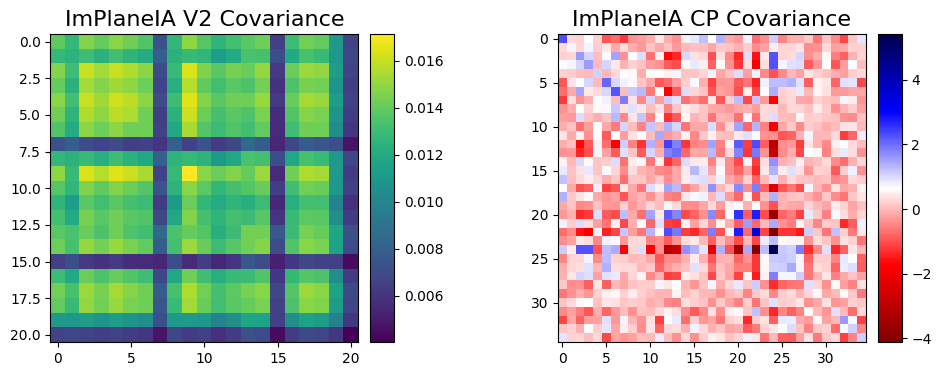

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

img_v2_targcov = ax1.imshow(v2cov,vmin=vmin_v2,vmax=vmax_v2)
cax = fig.add_axes([ax1.get_position().x1+0.01,ax1.get_position().y0,0.02,ax1.get_position().height])
plt.colorbar(img_v2_targcov,cax=cax)

ax1.set_title('ImPlaneIA V2 Covariance',fontsize=16)

img_cp_targcov = ax2.imshow(t3cov,vmin=vmin_cp,vmax=vmax_cp, cmap=mpl.cm.seismic_r)
cax = fig.add_axes([ax2.get_position().x1+0.01,ax2.get_position().y0,0.02,ax2.get_position().height])
plt.colorbar(img_cp_targcov,cax=cax)

ax2.set_title('ImPlaneIA CP Covariance',fontsize=16)



In [169]:
v2s.mean(axis=1), v2s.std(axis=1) # pretty high standard deviation relative to value

(array([0.6047318 , 0.71701412, 0.48448734, 0.47716568, 0.49585648,
        0.48587549, 0.4249    , 0.85163578, 0.75458565, 0.43495105,
        0.53972917, 0.40974647, 0.45964098, 0.73419969, 0.6167838 ,
        0.87634784, 0.46720636, 0.59279831, 0.6051676 , 0.77992125,
        0.87748272]),
 array([0.11418944, 0.1083865 , 0.12301888, 0.11764015, 0.12340022,
        0.12086687, 0.11561835, 0.0751832 , 0.10858498, 0.12693183,
        0.11399261, 0.1066439 , 0.11158032, 0.11643129, 0.11785057,
        0.06959317, 0.10950333, 0.11934493, 0.11743416, 0.0959672 ,
        0.06144742]))

(0.0, 34.0)

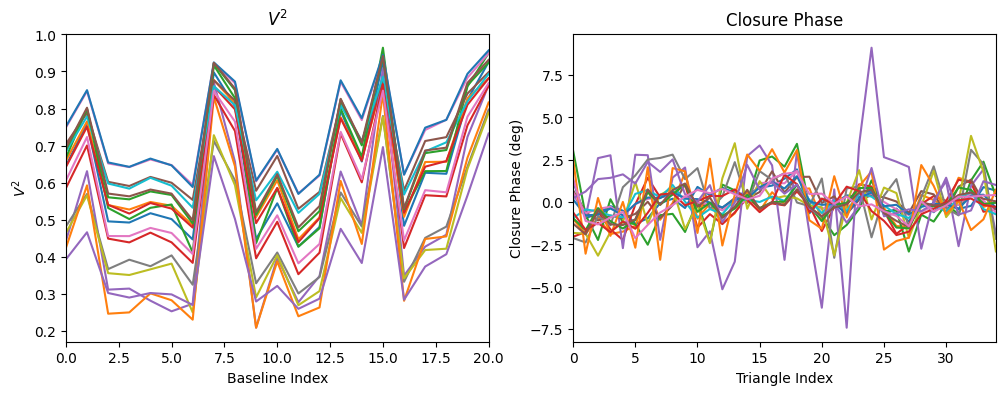

In [167]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

for j in range(17):
    ax1.plot(v2s[:,j])
    ax2.plot(t3s[:,j])

ax2.set_title('Closure Phase')
ax1.set_ylabel(r'$V^2$')
ax2.set_ylabel('Closure Phase (deg)')
ax1.set_title(r'$V^2$')

ax1.set_xlabel('Baseline Index')
ax1.set_xlim(0, v2s.shape[0]-1)
ax2.set_xlabel('Triangle Index')
ax2.set_xlim(0, t3s.shape[0]-1)

Text(0.5, 0.98, 'All Reduced Data')

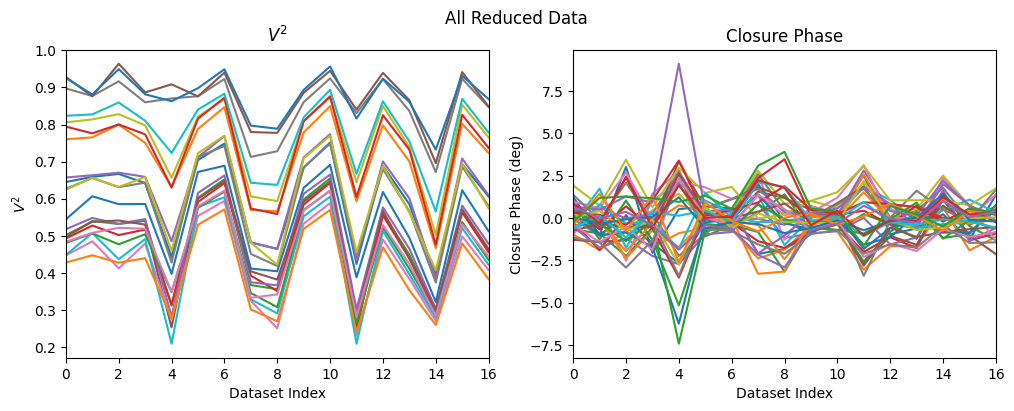

In [165]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

for j in range(21):
    ax1.plot(v2s[j,:])


for j in range(35):
    ax2.plot(t3s[j,:])

ax1.set_xlim(0,16)
ax2.set_xlim(0,16)
ax1.set_xlabel('Dataset Index')
ax2.set_xlabel('Dataset Index')

ax1.set_title(r'$V^2$')
ax2.set_title('Closure Phase')
ax1.set_ylabel(r'$V^2$')
ax2.set_ylabel('Closure Phase (deg)')

plt.suptitle('All Reduced Data')

Now look at the `multi` datasets. These are multi-exposure datasets that will help us understand bad frames.

In [129]:
fnames_multi = glob('../data/testing_1242/implaneia_rachel/multi*.oifits')
print(len(fnames_multi), 'files')

17 files


In [139]:
# look at one 
multi = load(fnames_multi[0])

Text(0.5, 0.98, 'Integration History of One Dataset')

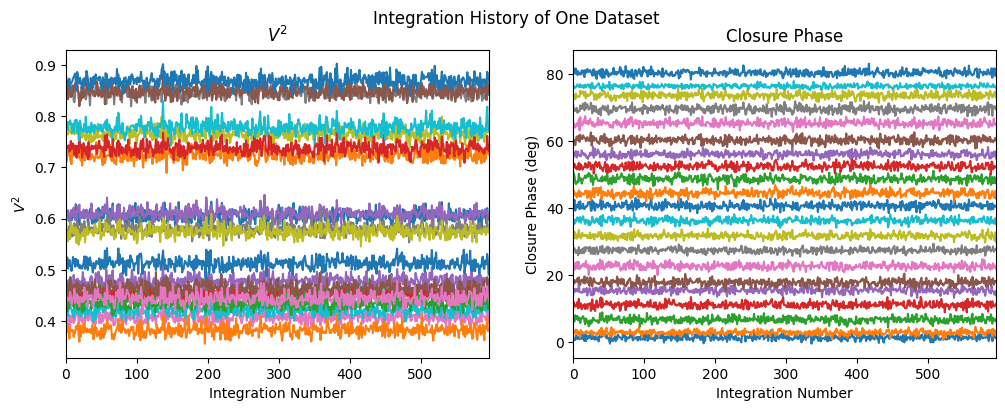

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

for j in range(21):
    ax1.plot(multi['OI_VIS2']['VIS2DATA'][j,:])
    ax2.plot(multi['OI_T3']['T3PHI'][j,:]+j*4)


ax1.set_xlim(0,multi['OI_VIS2']['VIS2DATA'].shape[1]-1)
ax2.set_xlim(0,multi['OI_T3']['T3PHI'].shape[1]-1)
ax1.set_xlabel('Integration Number')
ax2.set_xlabel('Integration Number')

ax1.set_title(r'$V^2$')
ax2.set_title('Closure Phase')
ax1.set_ylabel(r'$V^2$')
ax2.set_ylabel('Closure Phase (deg)')

plt.suptitle('Integration History of One Dataset')


These actually look reasonably stable from integration to integration.